In [2]:
import osmnx as ox
import random
import heapq
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [26]:
place = "Guadalajara, Jalisco" 

G = ox.graph_from_place(place, network_type="drive")

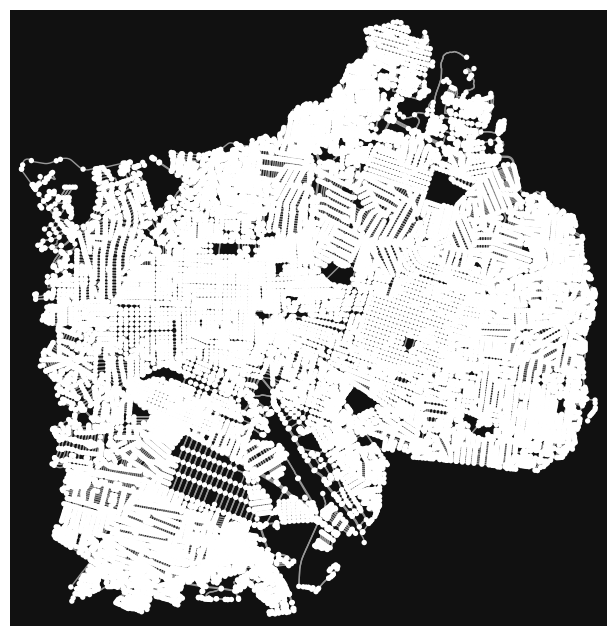

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [27]:
ox.plot_graph(G)

In [4]:
latitude = 25.4380
longuitude = -100.9737

G = ox.graph_from_point((latitude, longuitude), dist=10000, network_type="drive")

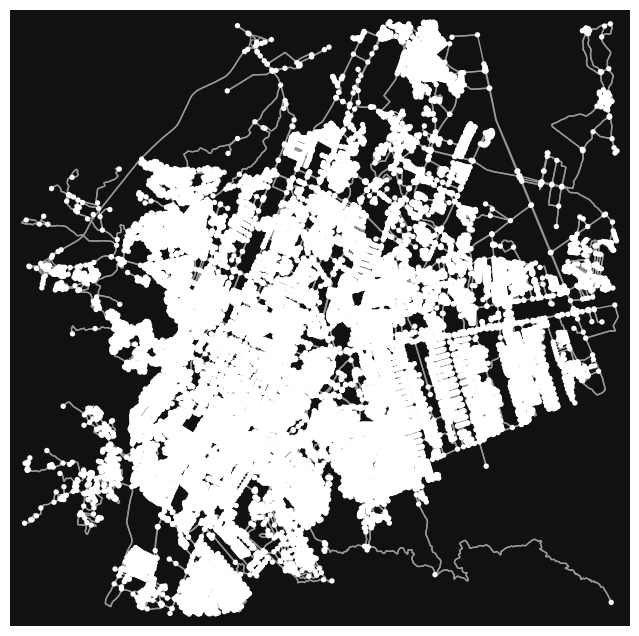

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [21]:
ox.plot_graph(G)

In [6]:
def style_unvisited_edge(edge):        
    G.edges[edge]["color"] = "#d36206"
    G.edges[edge]["alpha"] = 0.2
    G.edges[edge]["linewidth"] = 0.5

def style_visited_edge(edge):
    G.edges[edge]["color"] = "#d36206"
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

def style_active_edge(edge):
    G.edges[edge]["color"] = '#e8a900'
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

def style_path_edge(edge):
    G.edges[edge]["color"] = "white"
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

In [7]:
def plot_graph():
    ox.plot_graph(
        G,
        node_size =  [ G.nodes[node]["size"] for node in G.nodes ],
        edge_color = [ G.edges[edge]["color"] for edge in G.edges ],
        edge_alpha = [ G.edges[edge]["alpha"] for edge in G.edges ],
        edge_linewidth = [ G.edges[edge]["linewidth"] for edge in G.edges ],
        node_color = "white",
        bgcolor = "#18080e"
    )

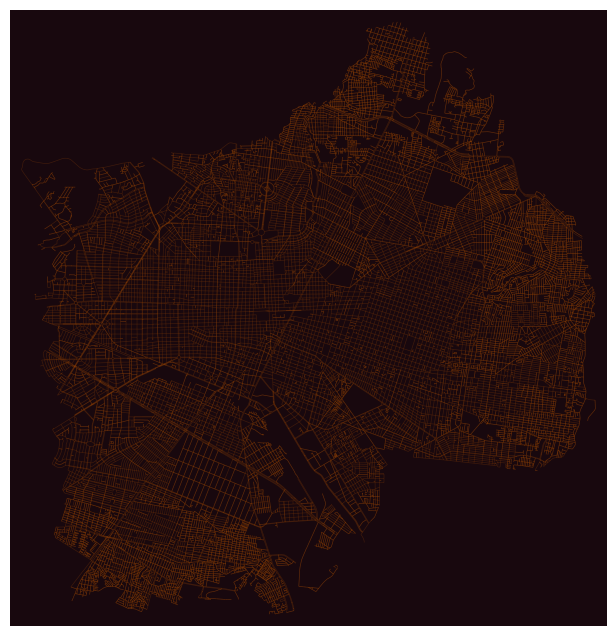

In [28]:
for node in G.nodes:
    G.nodes[node]["size"] = 0
for edge in G.edges:
    style_unvisited_edge(edge)
    
plot_graph()

In [32]:
nodes, edges = ox.graph_to_gdfs(G)
edges.head()

osmid  oneway   lanes  \
u         v          key                                                      
291749780 804393226  0                            763167758    True       4   
          2152515513 0                            205277764    True       1   
294507697 2296203801 0                            220508065    True       2   
          2296203746 0    [220508080, 769736613, 220508070]    True  [2, 3]   
294510724 2296203730 0    [220508056, 220508075, 104679084]    True  [2, 3]   

                                    ref                        name  \
u         v          key                                              
291749780 804393226  0    MEX 54;MEX 57  Boulevard Antonio Cárdenas   
          2152515513 0              NaN                         NaN   
294507697 2296203801 0              NaN                         NaN   
          2296203746 0              NaN    Boulevard Los Fundadores   
294510724 2296203730 0              NaN    Boulevard Los Fundadores   

                               highway reversed   length  \
u         v          key                                   
291749780 804393226  0         primary    False   41.991   
          2152515513 0    primary_link    False   64.250   
294507697 2296203801 0      trunk_link    False  390.389   
          2296203746 0           trunk    False  912.811   
294510724 2296203730 0           trunk    False  855.797   

                                                                   geometry  \
u         v          key                                                      
291749780 804393226  0    LINESTRING (-101.00362 25.39350, -101.00346 25...   
          2152515513 0    LINESTRING (-101.00362 25.39350, -101.00351 25...   
294507697 2296203801 0    LINESTRING (-100.88375 25.44060, -100.88544 25...   
          2296203746 0    LINESTRING (-100.88375 25.44060, -100.88760 25...   
294510724 2296203730 0    LINESTRING (-100.89248 25.43899, -100.88882 25...   

                         bridge maxspeed tunnel access junction width  
u         v          key                                               
291749780 804393226  0      NaN      NaN    NaN    NaN      NaN   NaN  
          2152515513 0      NaN      NaN    NaN    NaN      NaN   NaN  
294507697 2296203801 0      NaN      NaN    NaN    NaN      NaN   NaN  
          2296203746 0      yes       90    NaN    NaN      NaN   NaN  
294510724 2296203730 0      yes       90    NaN    NaN      NaN   NaN

In [31]:
for edge in G.edges:
    maxspeed = 40
    if "maxspeed" in G.edges[edge]:
        maxspeed = G.edges[edge]["maxspeed"]
        if type(maxspeed) == list:
            speeds = [int(speed) for speed in maxspeed]
            maxspeed = min(speeds)
        elif type(maxspeed) == str:
            maxspeed = int(maxspeed)
        
    G.edges[edge]["maxspeed"] = maxspeed
    G.edges[edge]["weight"] = G.edges[edge]["length"] / maxspeed
        

In [87]:
nodes, edges = ox.graph_to_gdfs(G) 
edges.head()

osmid  oneway   lanes  \
u         v          key                                                      
291749780 804393226  0                            763167758    True       4   
          2152515513 0                            205277764    True       1   
294507697 2296203801 0                            220508065    True       2   
          2296203746 0    [220508080, 769736613, 220508070]    True  [2, 3]   
294510724 2296203730 0    [220508056, 220508075, 104679084]    True  [2, 3]   

                                    ref                        name  \
u         v          key                                              
291749780 804393226  0    MEX 54;MEX 57  Boulevard Antonio Cárdenas   
          2152515513 0              NaN                         NaN   
294507697 2296203801 0              NaN                         NaN   
          2296203746 0              NaN    Boulevard Los Fundadores   
294510724 2296203730 0              NaN    Boulevard Los Fundadores   

                               highway reversed   length  maxspeed     weight  \
u         v          key                                                        
291749780 804393226  0         primary    False   41.991        40   1.049775   
          2152515513 0    primary_link    False   64.250        40   1.606250   
294507697 2296203801 0      trunk_link    False  390.389        40   9.759725   
          2296203746 0           trunk    False  912.811        90  10.142344   
294510724 2296203730 0           trunk    False  855.797        90   9.508856   

                            color  alpha  linewidth  \
u         v          key                              
291749780 804393226  0    #d36206    1.0        1.0   
          2152515513 0    #d36206    1.0        1.0   
294507697 2296203801 0    #d36206    0.2        0.5   
          2296203746 0    #d36206    0.2        0.5   
294510724 2296203730 0    #d36206    0.2        0.5   

                                                                   geometry  \
u         v          key                                                      
291749780 804393226  0    LINESTRING (-101.00362 25.39350, -101.00346 25...   
          2152515513 0    LINESTRING (-101.00362 25.39350, -101.00351 25...   
294507697 2296203801 0    LINESTRING (-100.88375 25.44060, -100.88544 25...   
          2296203746 0    LINESTRING (-100.88375 25.44060, -100.88760 25...   
294510724 2296203730 0    LINESTRING (-100.89248 25.43899, -100.88882 25...   

                         bridge tunnel access junction width  
u         v          key                                      
291749780 804393226  0      NaN    NaN    NaN      NaN   NaN  
          2152515513 0      NaN    NaN    NaN      NaN   NaN  
294507697 2296203801 0      NaN    NaN    NaN      NaN   NaN  
          2296203746 0      yes    NaN    NaN      NaN   NaN  
294510724 2296203730 0      yes    NaN    NaN      NaN   NaN

In [9]:
def dijkstra(orig, dest, plot=False):
    for node in G.nodes:
        G.nodes[node]["visited"] = False
        G.nodes[node]["distance"] = float("inf")
        G.nodes[node]["previous"] = None
        G.nodes[node]["size"] = 0
    for edge in G.edges:
        style_unvisited_edge(edge)
    G.nodes[orig]["distance"] = 0
    G.nodes[orig]["size"] = 50
    G.nodes[dest]["size"] = 50
    pq = [(0, orig)]
    step = 0
    while pq:
        _, node = heapq.heappop(pq)
        if node == dest:
            if plot:
                print("Iteraciones: ", step)
                plot_graph()
            return
        if G.nodes[node]["visited"]: continue
        G.nodes[node]["visited"] = True
        for edge in G.out_edges(node):
            style_visited_edge((edge[0], edge[1], 0))
            neighbor = edge[1]
            weight = G.edges[(edge[0], edge[1], 0)]["weight"]
            if G.nodes[neighbor]["distance"] > G.nodes[node]["distance"] + weight:
                G.nodes[neighbor]["distance"] = G.nodes[node]["distance"] + weight
                G.nodes[neighbor]["previous"] = node
                heapq.heappush(pq, (G.nodes[neighbor]["distance"], neighbor))
                for edge2 in G.out_edges(neighbor):
                    style_active_edge((edge2[0], edge2[1], 0))
        step += 1
            
            
        
    

In [10]:
def distance(node1, node2):
    x1, y1 = G.nodes[node1]["x"], G.nodes[node1]["y"]
    x2, y2 = G.nodes[node2]["x"], G.nodes[node2]["y"]
    return ((x2 - x1)**2 + (y2 - y1)**2)**0.5

def a_star(orig, dest, plot=False):
    for node in G.nodes:
        G.nodes[node]["previous"] = None
        G.nodes[node]["size"] = 0
        G.nodes[node]["g_score"] = float("inf")
        G.nodes[node]["f_score"] = float("inf")
    for edge in G.edges:
        style_unvisited_edge(edge)
    G.nodes[orig]["size"] = 50
    G.nodes[dest]["size"] = 50
    G.nodes[orig]["g_score"] = 0
    G.nodes[orig]["f_score"] = distance(orig, dest)
    pq = [(G.nodes[orig]["f_score"], orig)]
    step = 0
    while pq:
        _, node = heapq.heappop(pq)
        if node == dest:
            if plot:
                print("Iteraciones:", step)
                plot_graph()
            return
        for edge in G.out_edges(node):
            style_visited_edge((edge[0], edge[1], 0))
            neighbor = edge[1]
            tentative_g_score = G.nodes[node]["g_score"] + distance(node, neighbor)
            if tentative_g_score < G.nodes[neighbor]["g_score"]:
                G.nodes[neighbor]["previous"] = node
                G.nodes[neighbor]["g_score"] = tentative_g_score
                G.nodes[neighbor]["f_score"] = tentative_g_score + distance(neighbor, dest)
                heapq.heappush(pq, (G.nodes[neighbor]["f_score"], neighbor))
                for edge2 in G.out_edges(neighbor):
                    style_active_edge((edge2[0], edge2[1], 0))
        step += 1
            
            
        
    

In [16]:
def reconstruct_path(orig, dest, plot=False, algorithm=None):
    for edge in G.edges:
        style_unvisited_edge(edge)
    dist = 0
    speeds = []
    curr = dest
    while curr != orig:
        prev = G.nodes[curr]["previous"]
        dist += G.edges[(prev, curr, 0)]["length"]
        speeds.append(G.edges[(prev, curr, 0)]["maxspeed"])
        style_path_edge((prev, curr, 0))
        #if algorithm:
        #    G.edges[prev, curr, 0][f"{algorithm}_uses"] = G.edges[(prev, curr, 0)].get(f"{algorithm}_uses", 0) + 1
        curr = prev
    dist /= 1000
    if plot:
        print(f"Distance: {dist}")
        print(f"Avg. Speed: {sum(speeds)/len(speeds)}")
        print(f"Total time: {dist/(sum(speeds)/len(speeds)) * 60}")
        plot_graph()

In [32]:
start = random.choice(list(G.nodes))
end = random.choice(list(G.nodes))

Iteraciones:  20741


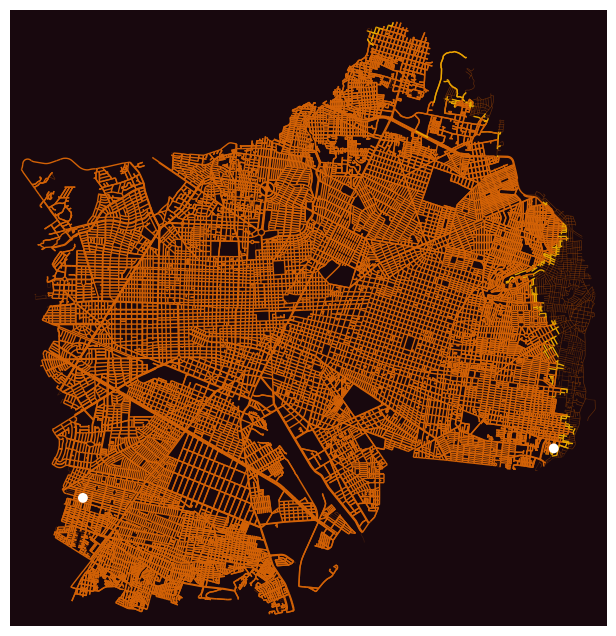

In [33]:
dijkstra(start, end, plot=True)

Distance: 15.121997999999998
Avg. Speed: 42.01183431952663
Total time: 21.596768974647883


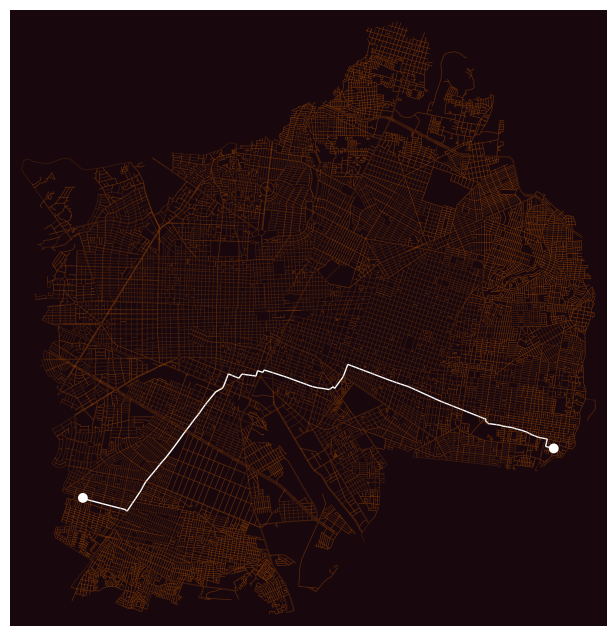

In [34]:
reconstruct_path(start, end, plot=True)

Iteraciones: 8857


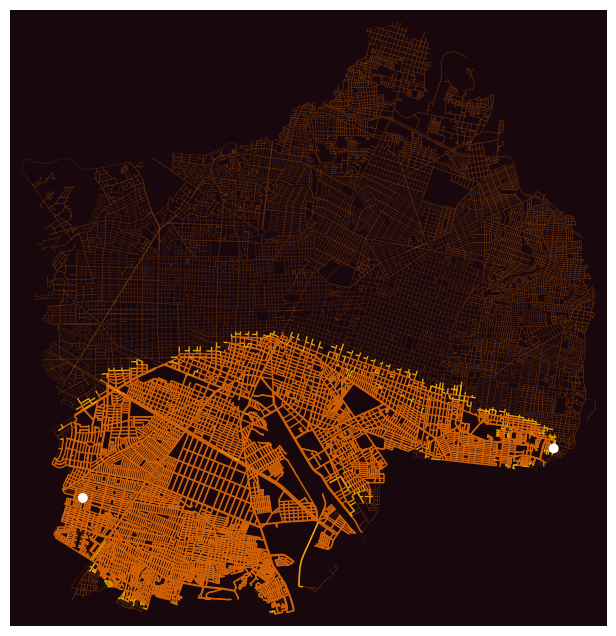

In [35]:
a_star(start, end, plot=True)

Distance: 15.068911000000002
Avg. Speed: 41.91358024691358
Total time: 21.57140131369661


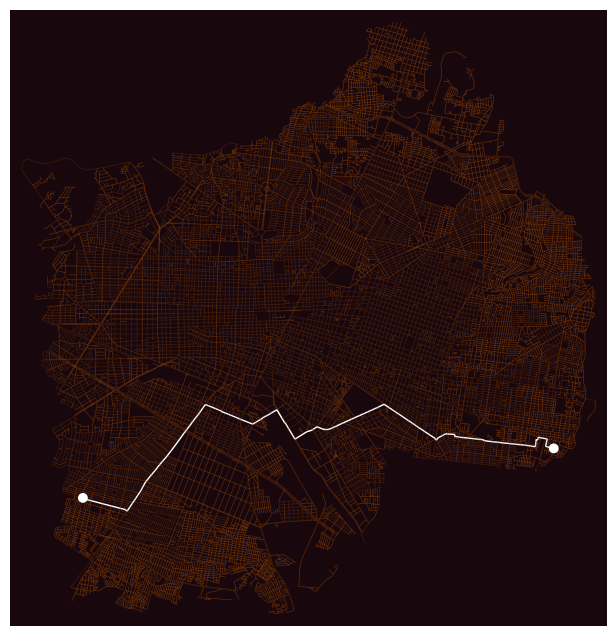

In [36]:
reconstruct_path(start, end, plot=True)